In [10]:
# This code is inspired from the Qiskit Textbook
# We will try to implement a quantum adder
# we first need to strat with a half added, just like we do in adding binary numbers

from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

# we will first start with inplementing a half adder
# For a half adder, we take 2 bits as an input, and we have 2 bits as an output
qc_ha = QuantumCircuit(4,2)
# we will first encode inputs in qubits 0 and 1
qc_ha.x(0) # this is setting the first input to 1
qc_ha.x(1) # this is setting the secoind input to 1
#qc_ha.() # the barrier is only used to give us visibility and clarity

# we know that if both inputs are the same, the leftmost bit of the output would be 0
# we will use this fact to compute the leftmost bit that is q2
# In a classical computer, we use the XOR gate for this purpose
# in a quantum computer, we will use the C-NOT gate (controlled NOT gate)
# the CNOT gate takes 2 inputs, the control qubit, and the target qubit
# it overwritres the result of the operation (that is done on the control and target qubits) in the target qubit
# the CNOT gate writes 0 if both qubits are the same, and 1 otherwise
# since we do not want to overwrite any if the input qubits, we will apply the CNOT gate twice between both qubits and a third qubit set to 0


qc_ha.cx(0,2)
#qc_ha.cx(1,2)barrier

# Now we need to figure out the rightmost bit of the output, that is q3
# we can notice that the rightmost bit is 1 in the only case when both qubits have the value 1
# to detect that, we usually use an AND operator in classical computers
# in a quantum computer, we will use the Toffoli gate, it takes two control qubits and one target qubit as input
# then writes a 1 in the target qubit if both control qubits are 1

# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()

# Now we q2 and q3 representing the output of the half adder, we are left with measuring thenm
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐           ░       
q_0: ┤ X ├──■────■───░───────
     ├───┤  │    │   ░       
q_1: ┤ X ├──┼────■───░───────
     └───┘┌─┴─┐  │   ░ ┌─┐   
q_2: ─────┤ X ├──┼───░─┤M├───
          └───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────────┤ X ├─░──╫─┤M├
               └───┘ ░  ║ └╥┘
c: 2/═══════════════════╩══╩═
                        0  1

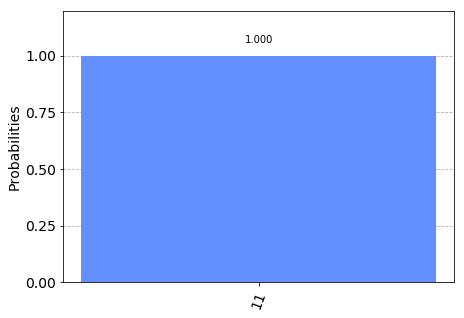

In [11]:
# we will again use the quantum simulator to run the circuit multiple times
# try to change the input qubuts values by applying/not applying the NOT gate on them and see

sim = Aer.get_backend('qasm_simulator') 
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [ ]:
# Now we need to implement a full adder
# we will need to 